# 1D Diffusion Equation (Finite Difference Method)

We solve the 1D diffusion equation using:
- **Central difference** in space
- **Forward Euler** in time  
- Time step chosen from **Von Neumann stability** (CFL-like condition)

We compute and plot:
1. Initial condition (square wave)
2. Numerical solution after `nt` time steps


In [2]:
import numpy as np
from matplotlib import pyplot as plt

line = "-" * 48

print("Solving 1D Diffusion Equation using Finite Difference Method\n")


Solving 1D Diffusion Equation using Finite Difference Method



In [3]:
# setting the grid
nx = 41                    # grid points
dx = 2 / (nx - 1)          # grid spacing
nt = 20                    # number of timesteps
nu = 0.3                   # diffusion coefficient (called viscosity in your code)
cfl = 0.4
dt = cfl * dx**2 / nu      # von Neumann stability condition
r = nu * dt / dx**2

print(line)
print("Parameters")
print(line)
print(f"nx={nx}, dx={dx}")
print(f"nt={nt}, nu={nu}")
print(f"dt={dt}")
print(f"r = nu*dt/dx^2 = {r} (must be <= 0.5 for stability)")


------------------------------------------------
Parameters
------------------------------------------------
nx=41, dx=0.05
nt=20, nu=0.3
dt=0.0033333333333333344
r = nu*dt/dx^2 = 0.4 (must be <= 0.5 for stability)


In [4]:
# Initial condition (square wave)
print(line)
print("Computing Initial Solution...")
print(line)

u = np.ones(nx)
u[int(0.5/dx): int(1/dx) + 1] = 2

u0 = u.copy()   # IMPORTANT: save initial condition for plotting later

print("Initial u:")
print(u0)



------------------------------------------------
Computing Initial Solution...
------------------------------------------------
Initial u:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
print(line)
print("Calculating Numerical Solution......")
print(line)

for n in range(nt):           # nt steps (not nt+1)
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2*un[i] + un[i-1])

print(line)
print("Final Numerical Solution:")
print(line)
print(u)


------------------------------------------------
Calculating Numerical Solution......
------------------------------------------------
------------------------------------------------
Final Numerical Solution:
------------------------------------------------
[1.         1.01229729 1.02819998 1.05123802 1.08467922 1.1311346
 1.19205959 1.26720414 1.35430842 1.44906814 1.54557805 1.63700867
 1.71652417 1.77804459 1.81690841 1.83018758 1.81690841 1.77804459
 1.71652417 1.63700867 1.54557806 1.44906826 1.35430928 1.26720866
 1.19207892 1.1312047  1.08490169 1.05186669 1.02980626 1.01604469
 1.00805338 1.0037474  1.00160628 1.00062867 1.00022247 1.0000701
 1.00001934 1.00000452 1.00000086 1.00000012 1.        ]


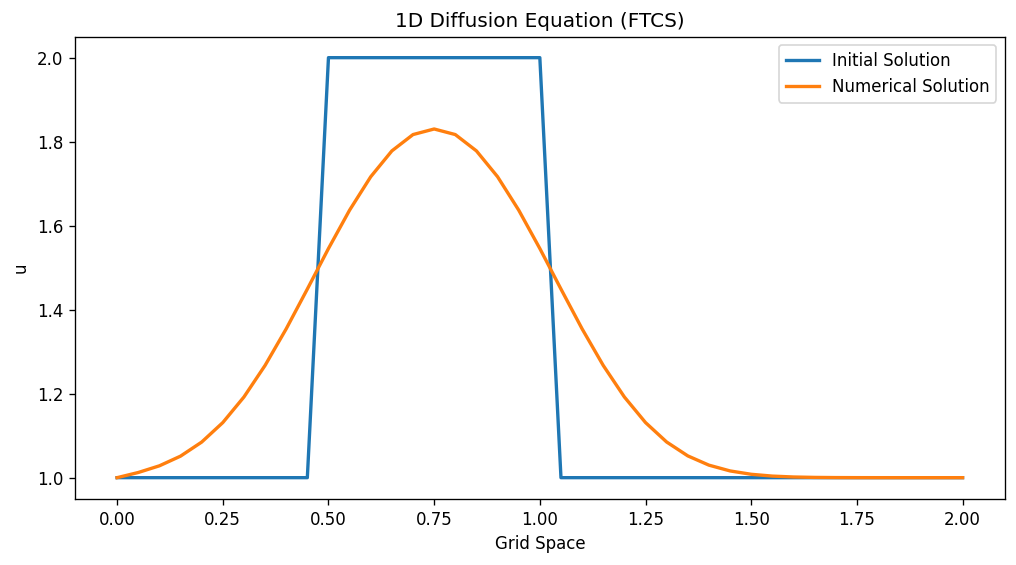

In [6]:
x = np.linspace(0, 2, nx)

plt.figure(figsize=(10, 5), dpi=120)
plt.plot(x, u0, label="Initial Solution", lw=2)
plt.plot(x, u,  label="Numerical Solution", lw=2)
plt.title("1D Diffusion Equation (FTCS)")
plt.xlabel("Grid Space")
plt.ylabel("u")
plt.legend()
plt.show()
